# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [4]:
# if plotnine is not installed in Jupter then use the following command to install it 
pip install plotnine


SyntaxError: invalid syntax (3169490593.py, line 2)

Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
  
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



[[-2.3542716  -3.17974359]
 [-2.1580049  -1.02006119]
 [-3.30439939 -3.30437804]
 ...
 [ 9.86405669 13.6746041 ]
 [ 5.457008    9.9319843 ]
 [ 8.51133922  7.48845914]]
[0 0 0 ... 5 5 5]


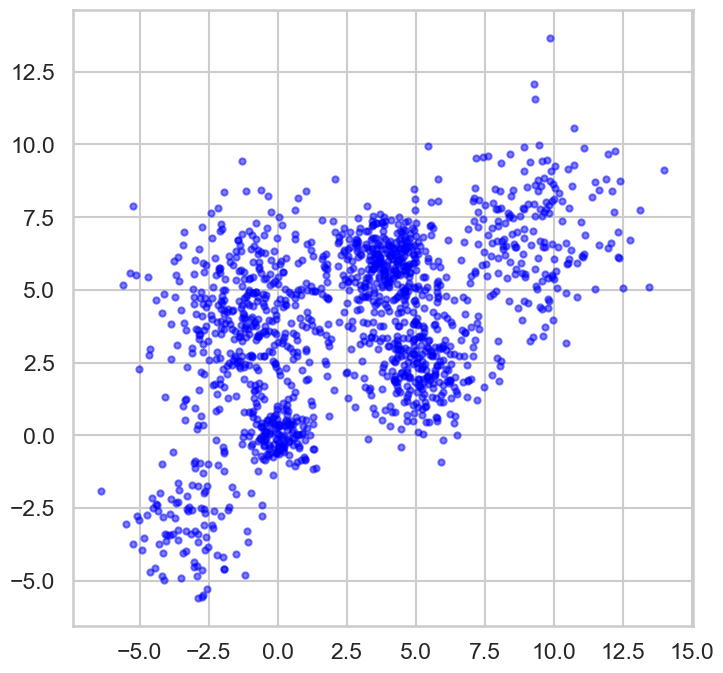

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)
print(Multi_blob_Data)
print(y)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

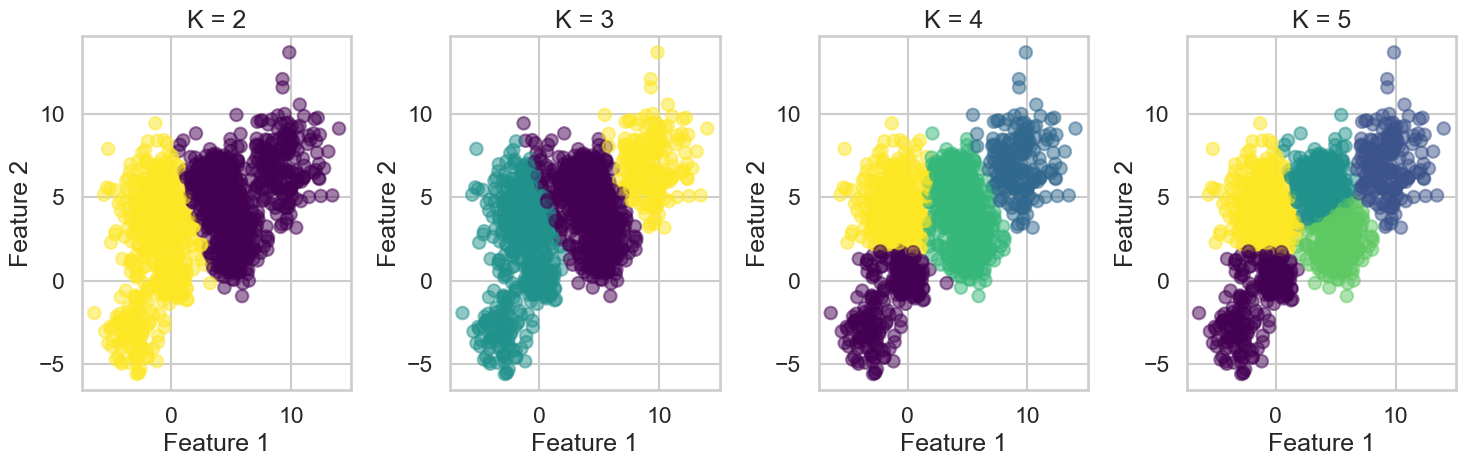

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def kmeans_with_different_K(data, k_values):
    fig, axs = plt.subplots(1, len(k_values), figsize=(15, 5))

    for i, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        centroids = kmeans.cluster_centers_

        axs[i].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
        
        axs[i].set_title(f'K = {k}')
        axs[i].set_xlabel('Feature 1')
        axs[i].set_ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

k_values = range(2, 6)  
kmeans_with_different_K(Multi_blob_Data, k_values)


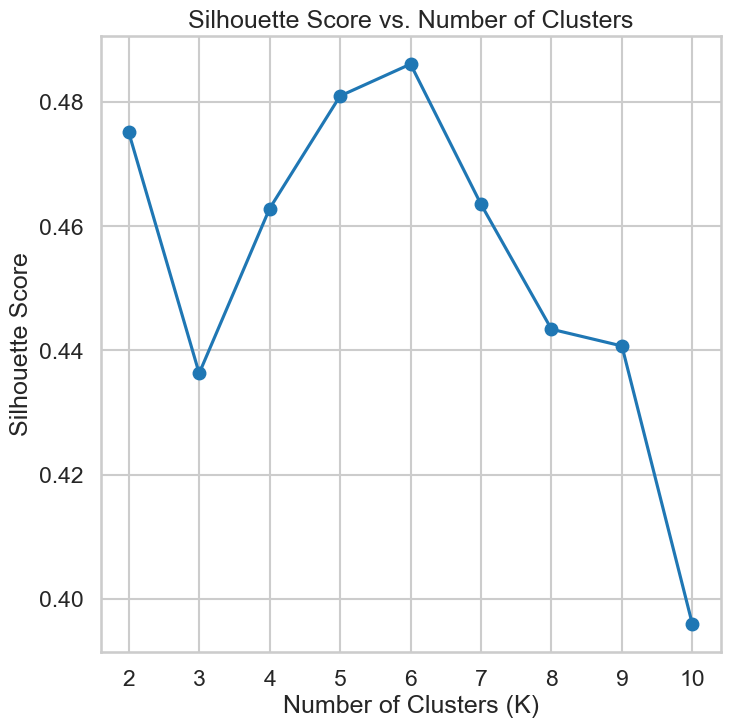

Best K based on silhouette score: 6
Silhouette Score for Best K: 0.48614459735646176


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_distortion(data, max_k):
    distortions = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.plot(range(1, max_k+1), distortions, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.title('Distortion vs. Number of Clusters')
    plt.show()

def plot_silhouette_score(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.show()

def find_best_k(data, max_k):
    best_score = -1
    best_k = 0
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_k = k
    return best_k, best_score


max_k = 10

plot_silhouette_score(Multi_blob_Data, max_k)
best_k, best_score = find_best_k(Multi_blob_Data, max_k)
print("Best K based on silhouette score:", best_k)
print("Silhouette Score for Best K:", best_score)


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

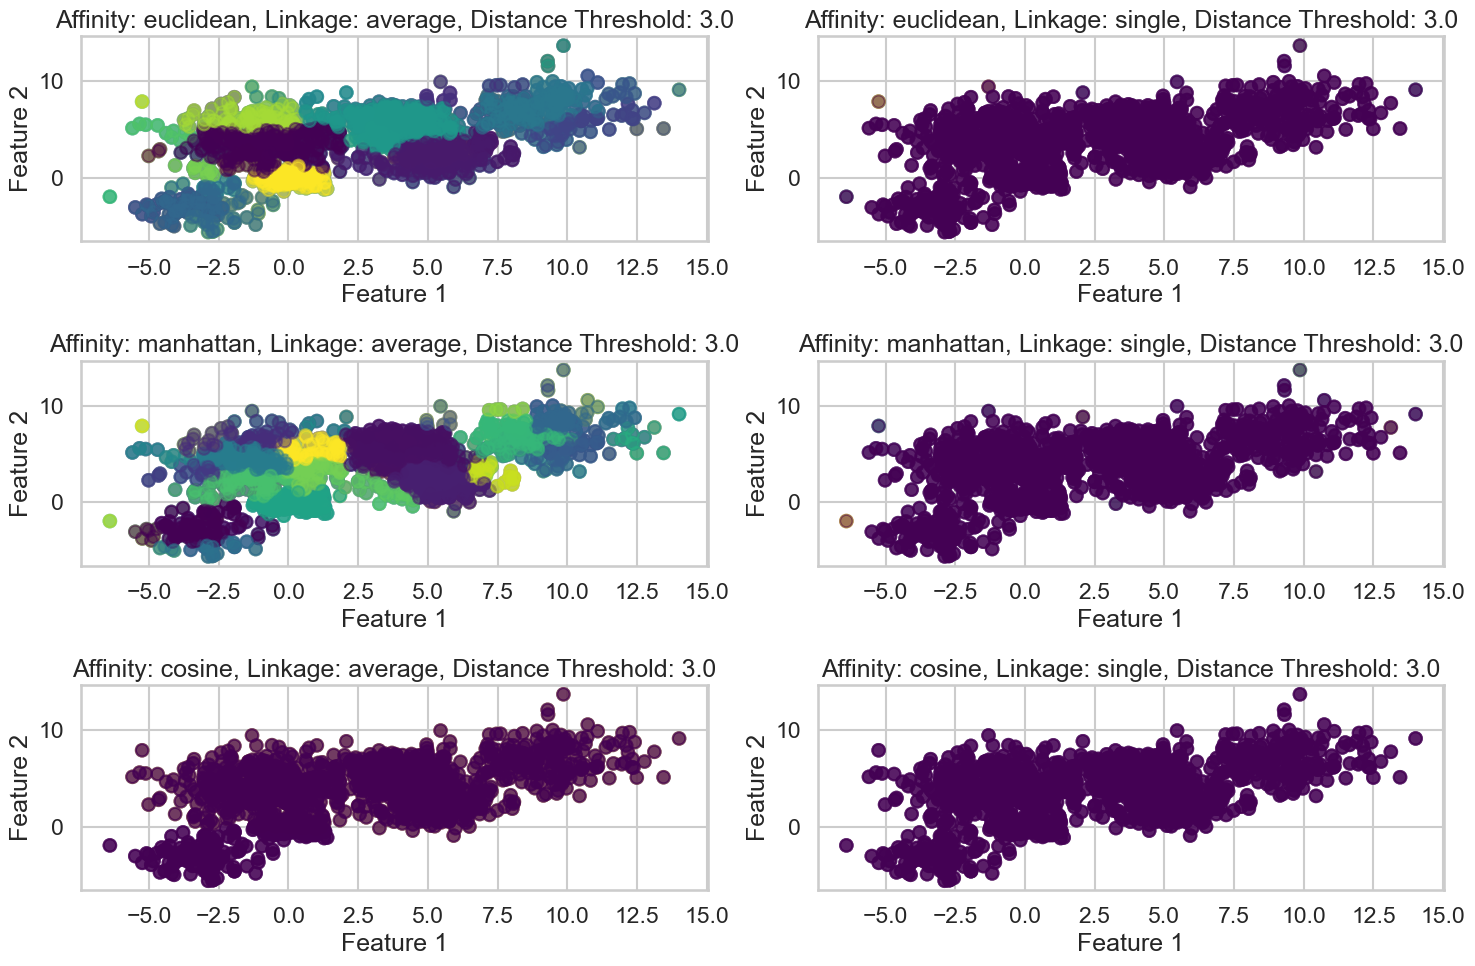

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def cluster_with_agglomerative(data, affinity_list, linkage_list, distance_threshold_list):
    fig, axs = plt.subplots(len(affinity_list), len(linkage_list), figsize=(15, 10))
    for i, affinity in enumerate(affinity_list):
        for j, linkage in enumerate(linkage_list):
            for threshold in distance_threshold_list:
                clustering = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=threshold)
                labels = clustering.fit_predict(data)
                
                axs[i, j].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
                axs[i, j].set_title(f'Affinity: {affinity}, Linkage: {linkage}, Distance Threshold: {threshold}')
                axs[i, j].set_xlabel('Feature 1')
                axs[i, j].set_ylabel('Feature 2')
    plt.tight_layout()
    plt.show()


affinity_list = ['euclidean', 'manhattan', 'cosine']
linkage_list = ['average', 'single']
distance_threshold_list = [1.0, 2.0, 3.0]  # Adjust as needed
cluster_with_agglomerative(Multi_blob_Data, affinity_list, linkage_list, distance_threshold_list)


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

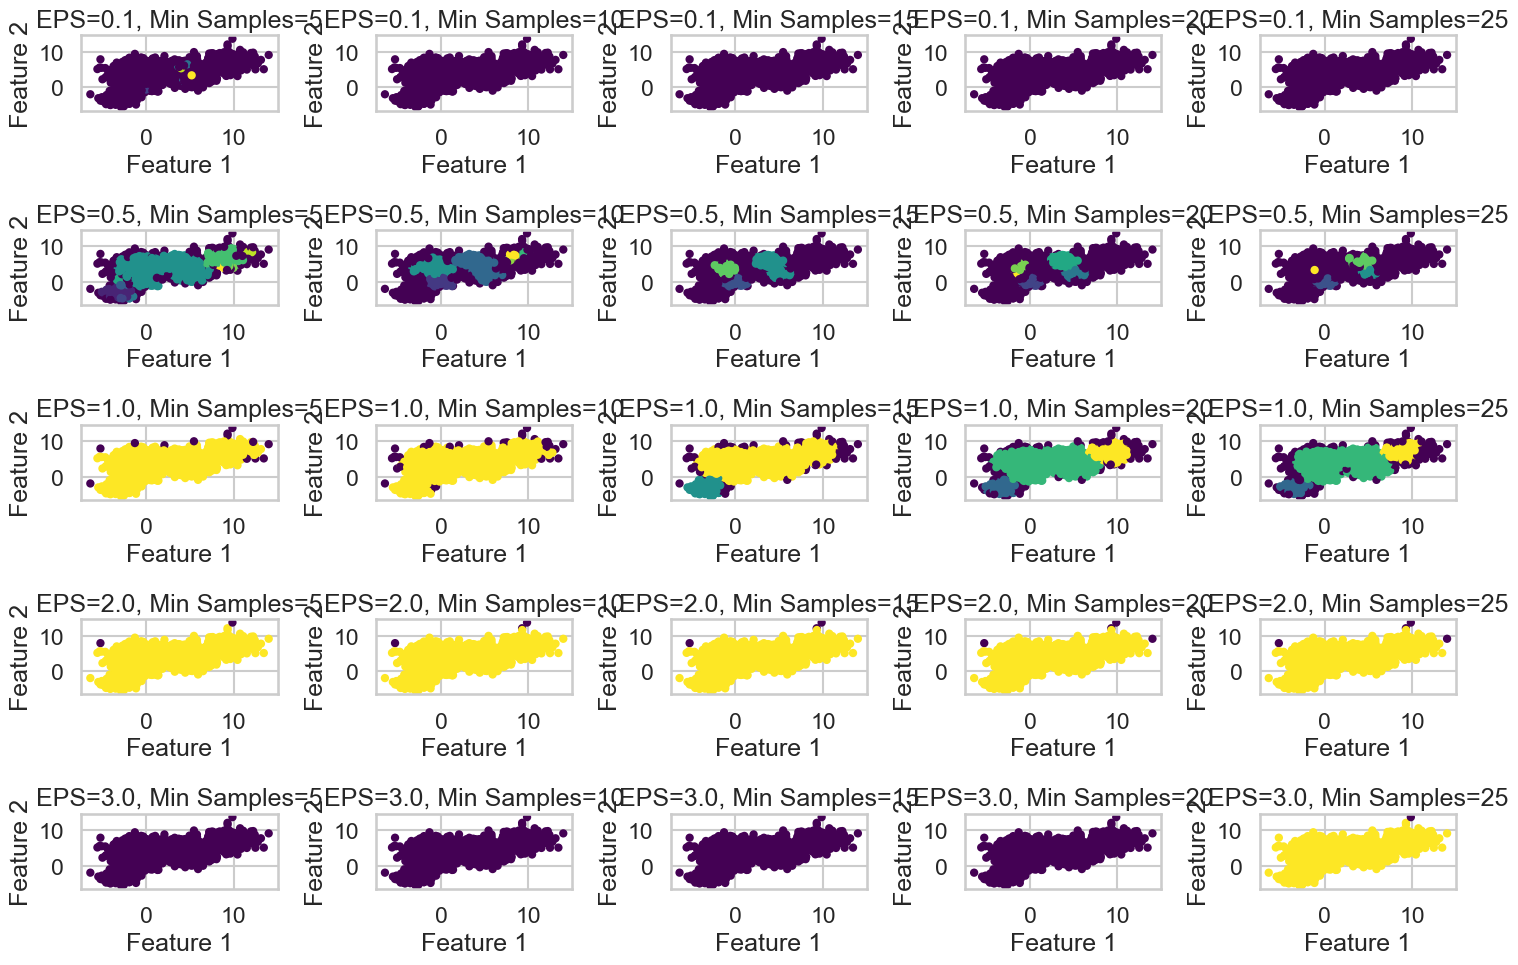

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

def cluster_with_dbscan(data, eps_values, min_samples_values):
    fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))
    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            axs[i, j].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=20)
            axs[i, j].set_title(f'EPS={eps}, Min Samples={min_samples}')
            axs[i, j].set_xlabel('Feature 1')
            axs[i, j].set_ylabel('Feature 2')
    plt.tight_layout()
    plt.show()


eps_values = [0.1, 0.5, 1.0, 2.0, 3.0]
min_samples_values = [5, 10, 15, 20, 25]
cluster_with_dbscan(Multi_blob_Data, eps_values, min_samples_values)


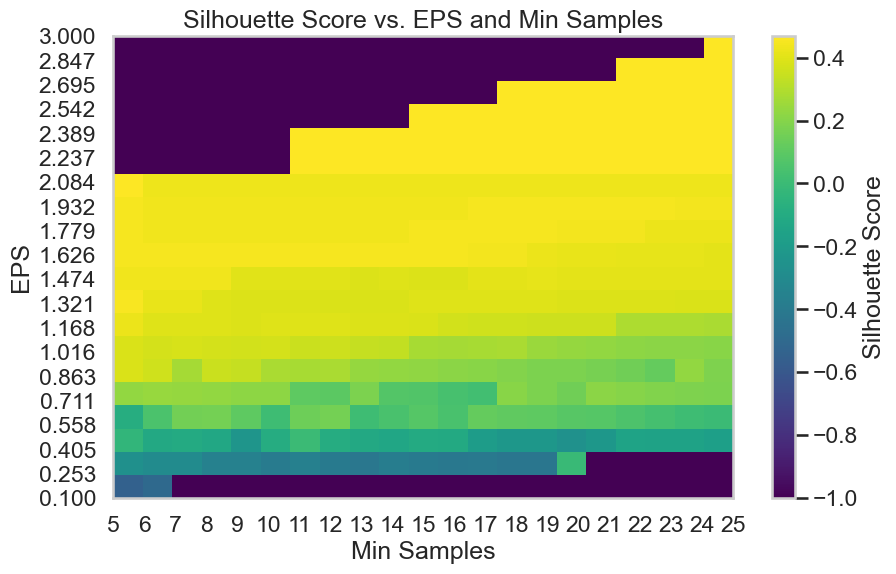

Best Silhouette Score: 0.4685207355522043
Best EPS: 2.0842105263157893
Best Min Samples: 5


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def evaluate_dbscan_parameters(data, eps_values, min_samples_values):
    silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            if len(np.unique(labels)) > 1:  
                silhouette_scores[i, j] = silhouette_score(data, labels)
            else:
                silhouette_scores[i, j] = -1

    return silhouette_scores

def plot_silhouette_score_heatmap(silhouette_scores, eps_values, min_samples_values):
    plt.figure(figsize=(10, 6))
    plt.imshow(silhouette_scores, cmap='viridis', origin='lower', aspect='auto', 
               extent=[min(min_samples_values), max(min_samples_values), min(eps_values), max(eps_values)])
    plt.colorbar(label='Silhouette Score')
    plt.xlabel('Min Samples')
    plt.ylabel('EPS')
    plt.title('Silhouette Score vs. EPS and Min Samples')
    plt.xticks(min_samples_values)
    plt.yticks(eps_values)
    plt.grid(False)
    plt.show()

def find_best_parameters(silhouette_scores, eps_values, min_samples_values):
    max_silhouette_score = np.max(silhouette_scores)
    max_indices = np.unravel_index(np.argmax(silhouette_scores), silhouette_scores.shape)
    best_eps = eps_values[max_indices[0]]
    best_min_samples = min_samples_values[max_indices[1]]
    return max_silhouette_score, best_eps, best_min_samples

eps_values = np.linspace(0.1, 3.0, 20)  
min_samples_values = np.arange(5, 26)  
silhouette_scores = evaluate_dbscan_parameters(Multi_blob_Data, eps_values, min_samples_values)
plot_silhouette_score_heatmap(silhouette_scores, eps_values, min_samples_values)
best_score, best_eps, best_min_samples = find_best_parameters(silhouette_scores, eps_values, min_samples_values)
print("Best Silhouette Score:", best_score)
print("Best EPS:", best_eps)
print("Best Min Samples:", best_min_samples)


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

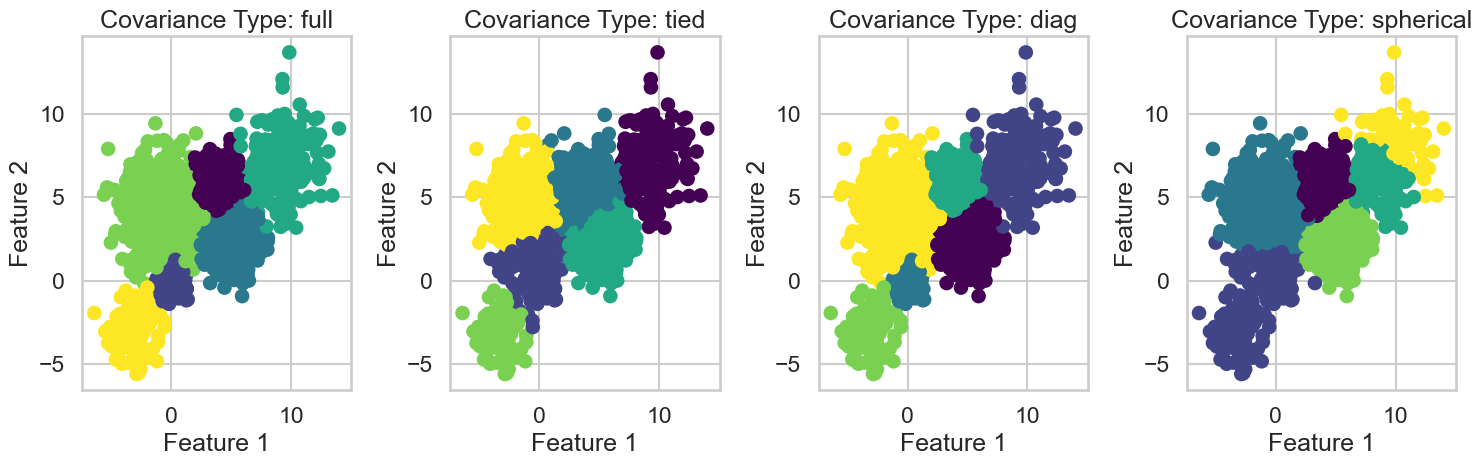

In [10]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def cluster_with_gmm(data, covariance_types):
    fig, axs = plt.subplots(1, len(covariance_types), figsize=(15, 5))
    for i, cov_type in enumerate(covariance_types):
        gmm = GaussianMixture(n_components=6, covariance_type=cov_type)
        gmm.fit(data)
        labels = gmm.predict(data)
        probs = gmm.predict_proba(data)
        
        axs[i].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
        axs[i].set_title(f'Covariance Type: {cov_type}')
        axs[i].set_xlabel('Feature 1')
        axs[i].set_ylabel('Feature 2')
    plt.tight_layout()
    plt.show()


covariance_types = ['full', 'tied', 'diag', 'spherical']
cluster_with_gmm(Multi_blob_Data, covariance_types)


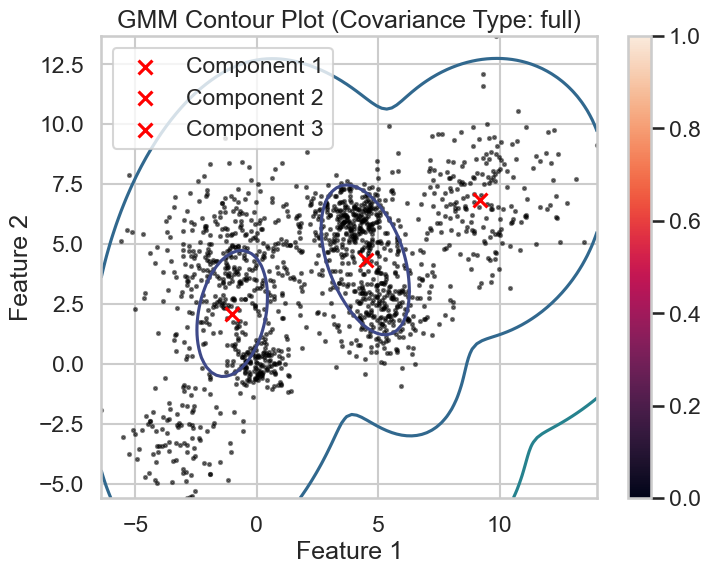

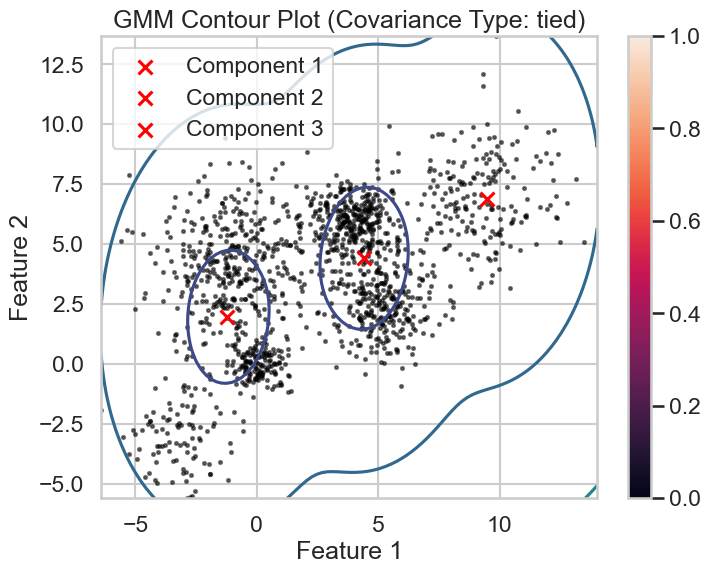

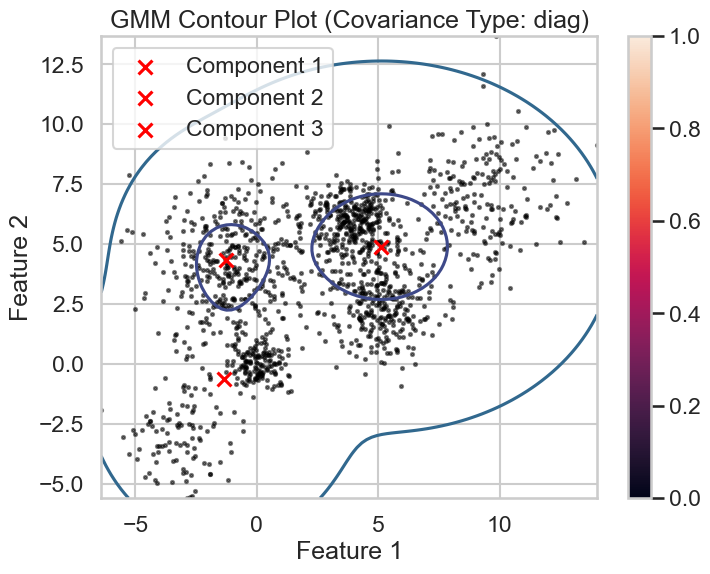

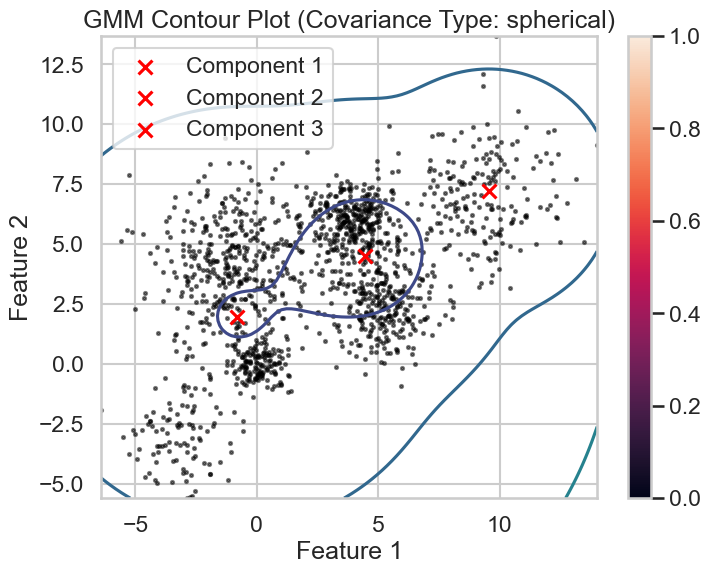

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

def plot_gmm_contour(data, n_components, covariance_type):
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gmm.fit(data)
    
    x, y = np.meshgrid(np.linspace(data[:,0].min(), data[:,0].max(), 100),
                       np.linspace(data[:,1].min(), data[:,1].max(), 100))
    XX = np.array([x.ravel(), y.ravel()]).T
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(x.shape)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], s=5, color='black', alpha=0.5)
    plt.contour(x, y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), cmap='viridis')
    
    for i in range(n_components):
        plt.scatter(gmm.means_[i, 0], gmm.means_[i, 1], s=100, marker='x', color='red', label=f'Component {i+1}')
    
    plt.title(f'GMM Contour Plot (Covariance Type: {covariance_type})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.legend()
    plt.show()


plot_gmm_contour(Multi_blob_Data, n_components=3, covariance_type='full')
plot_gmm_contour(Multi_blob_Data, n_components=3, covariance_type='tied')
plot_gmm_contour(Multi_blob_Data, n_components=3, covariance_type='diag')
plot_gmm_contour(Multi_blob_Data, n_components=3, covariance_type='spherical')


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [14]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load Iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target


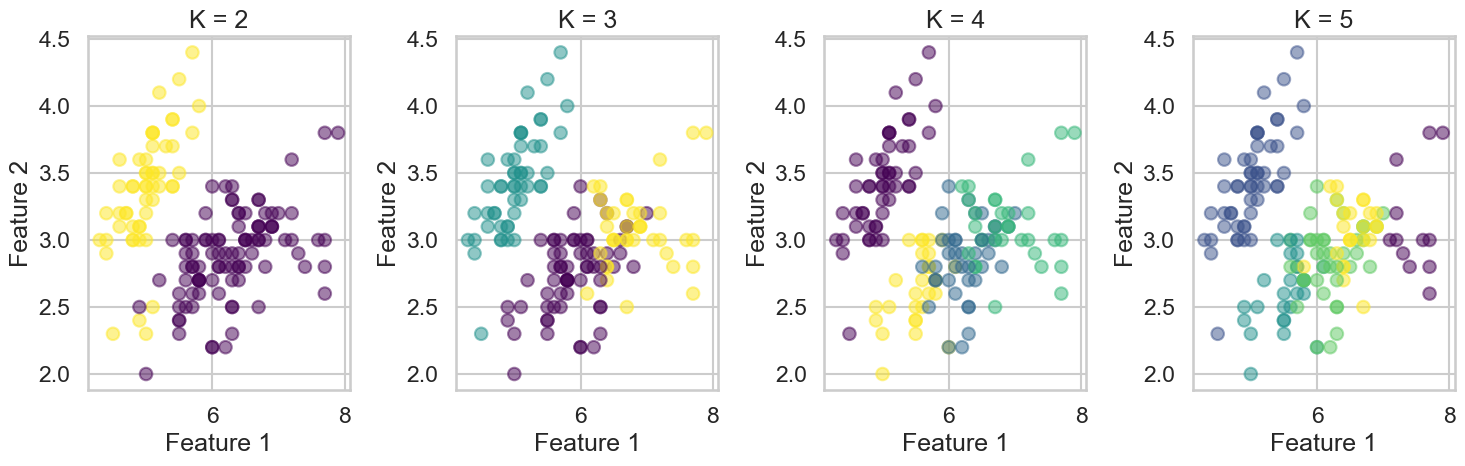

In [19]:
k_values = range(2, 6)  
kmeans_with_different_K(X, k_values)

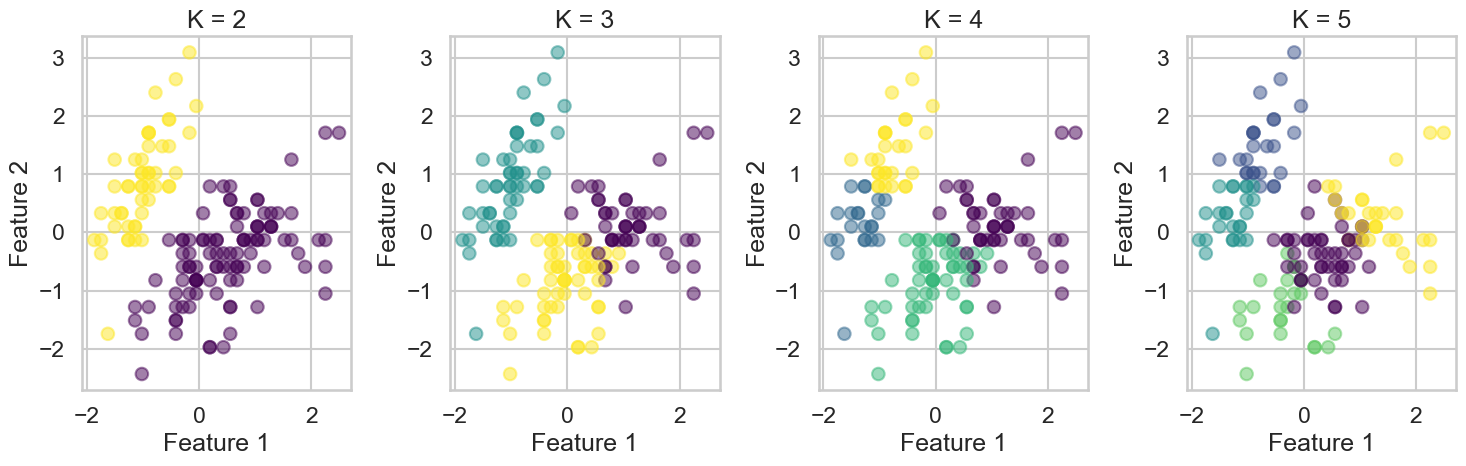

In [18]:
k_values = range(2, 6)  
kmeans_with_different_K(X_normalized, k_values)


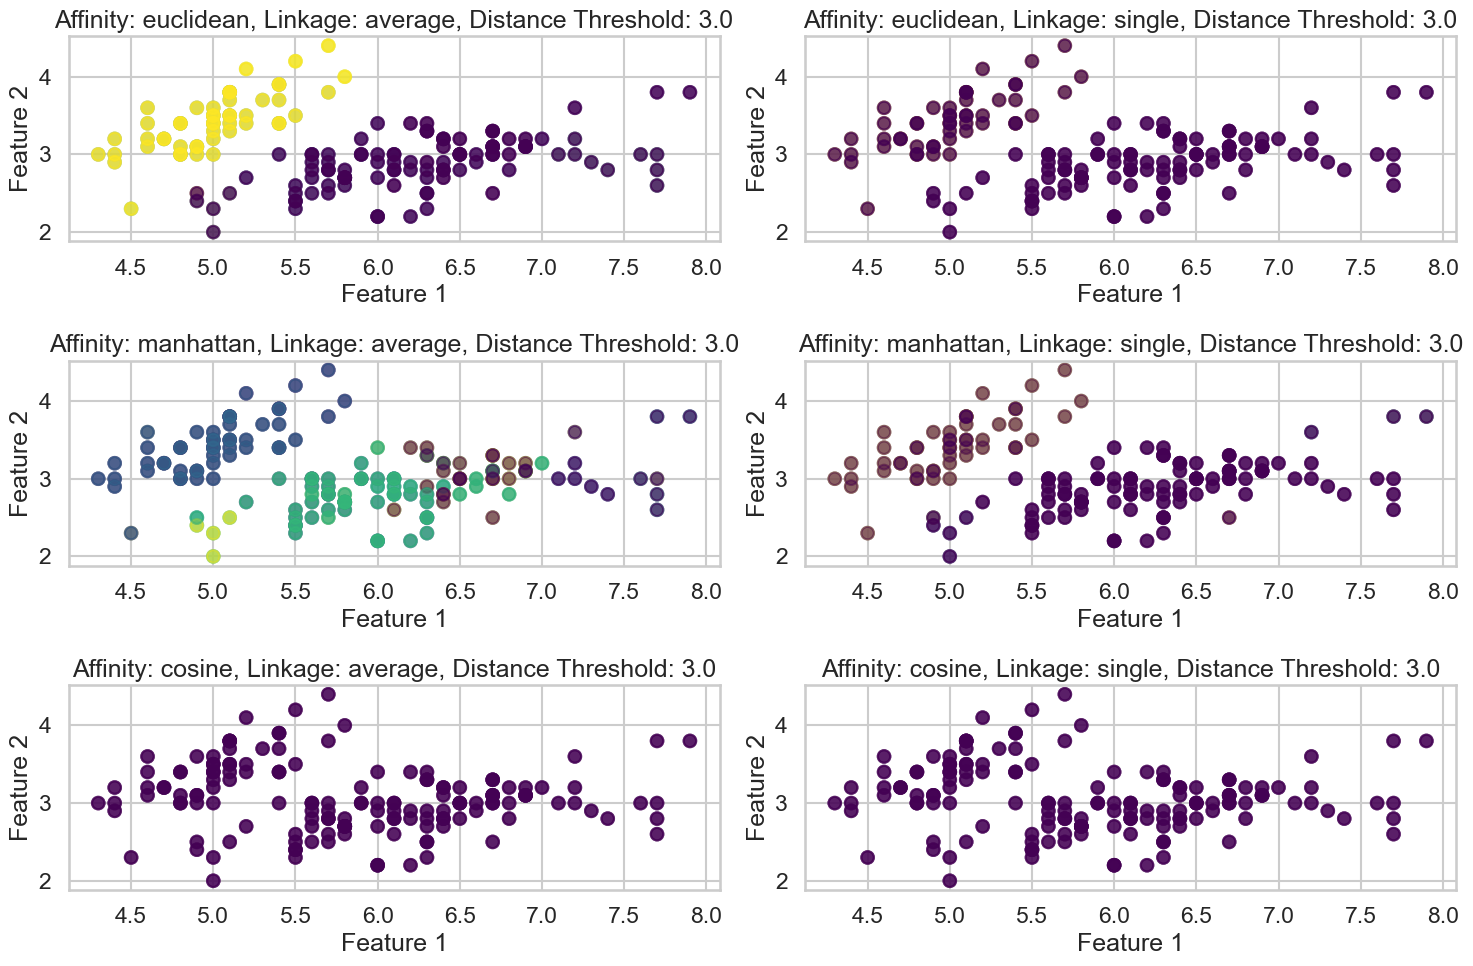

In [20]:
affinity_list = ['euclidean', 'manhattan', 'cosine']
linkage_list = ['average', 'single']
distance_threshold_list = [1.0, 2.0, 3.0] 
cluster_with_agglomerative(X, affinity_list, linkage_list, distance_threshold_list)
         

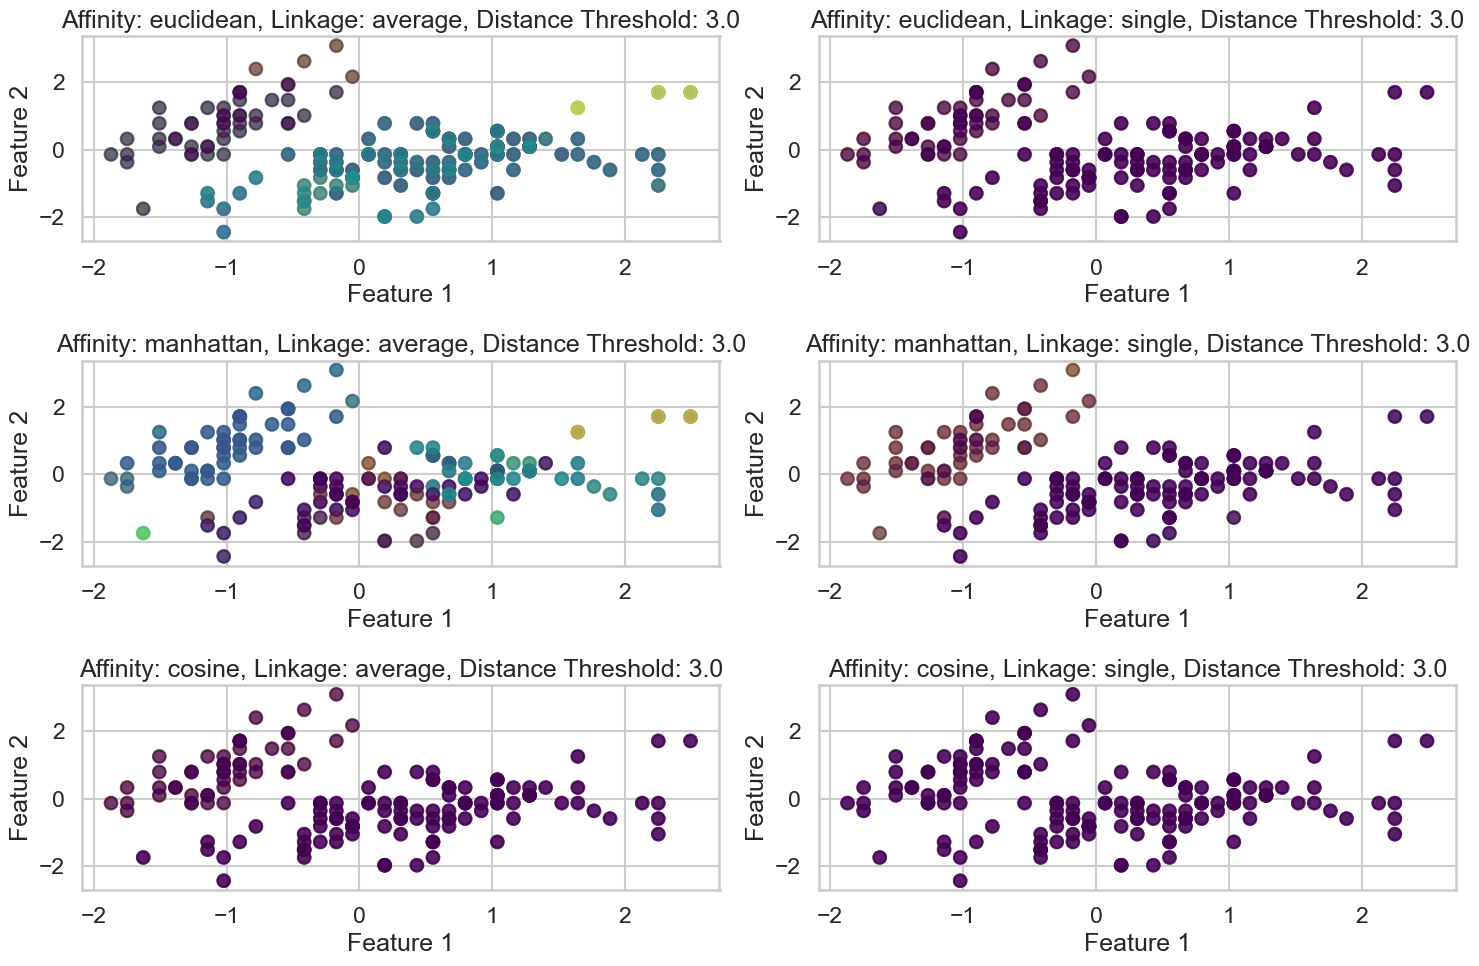

In [21]:
affinity_list = ['euclidean', 'manhattan', 'cosine']
linkage_list = ['average', 'single']
distance_threshold_list = [1.0, 2.0, 3.0]  
cluster_with_agglomerative(X_normalized, affinity_list, linkage_list, distance_threshold_list)

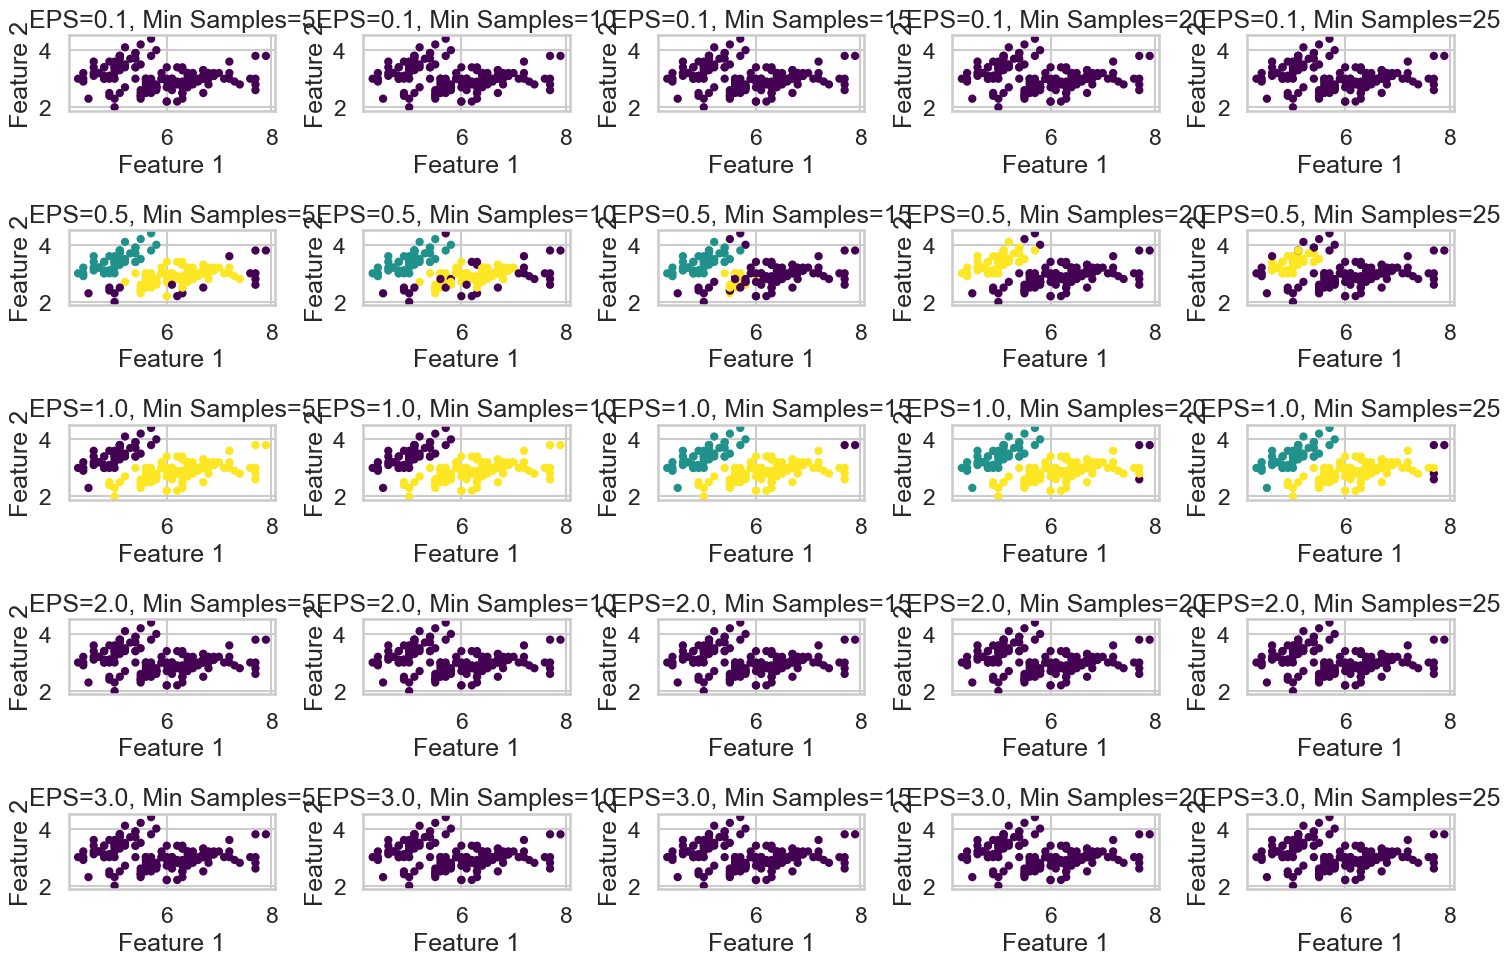

In [24]:
eps_values = [0.1, 0.5, 1.0, 2.0, 3.0]
min_samples_values = [5, 10, 15, 20, 25]
cluster_with_dbscan(X, eps_values, min_samples_values)

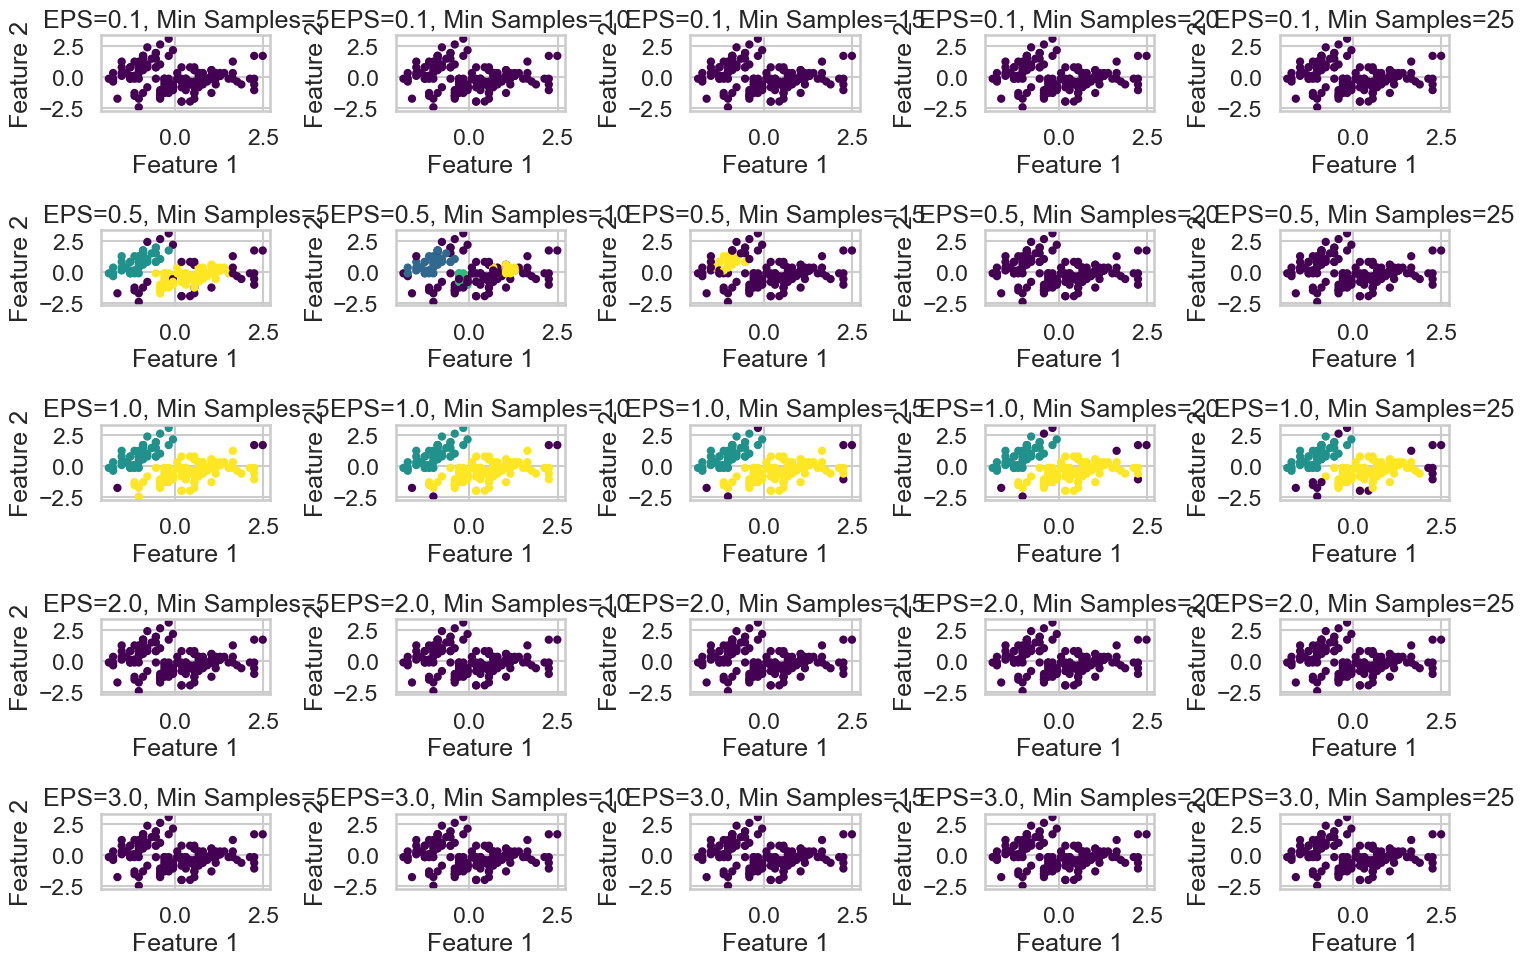

In [25]:
eps_values = [0.1, 0.5, 1.0, 2.0, 3.0]
min_samples_values = [5, 10, 15, 20, 25]
cluster_with_dbscan(X_normalized, eps_values, min_samples_values)

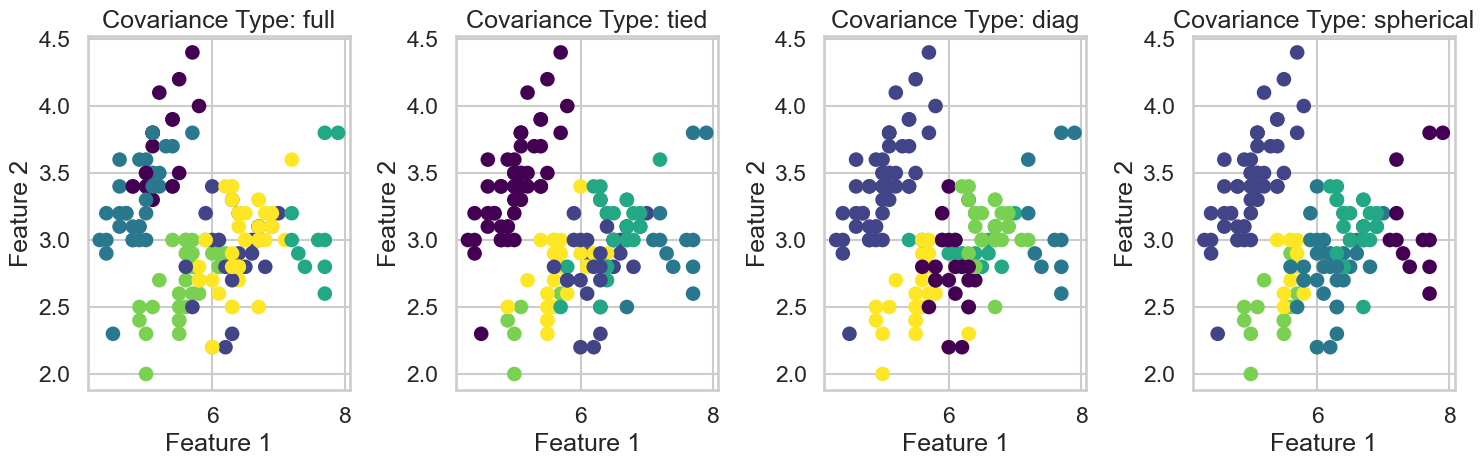

In [26]:

covariance_types = ['full', 'tied', 'diag', 'spherical']
cluster_with_gmm(X,covariance_types)

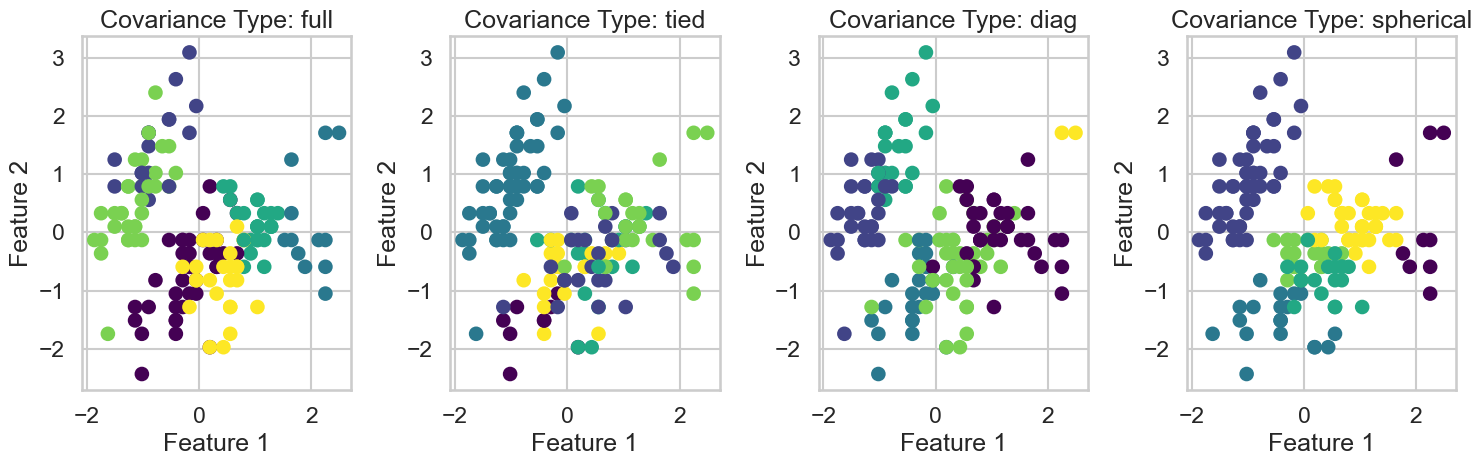

In [27]:
cluster_with_gmm(X_normalized,covariance_types)

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [39]:
import pandas as pd


customers_data = pd.read_csv("C:/Users/m7moo/Dropbox/My PC (DESKTOP-AVFOVL3)/Downloads/assignment1/Customer data.csv")


# relevant features
selected_features = ['Age', 'Income']


customers = customers_data[selected_features].values
scaler = StandardScaler()
customers_normalized = scaler.fit_transform(customers)
print(X)

[[    67 124670]
 [    22 150773]
 [    49  89210]
 ...
 [    31  86400]
 [    24  97968]
 [    25  68416]]


In [40]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


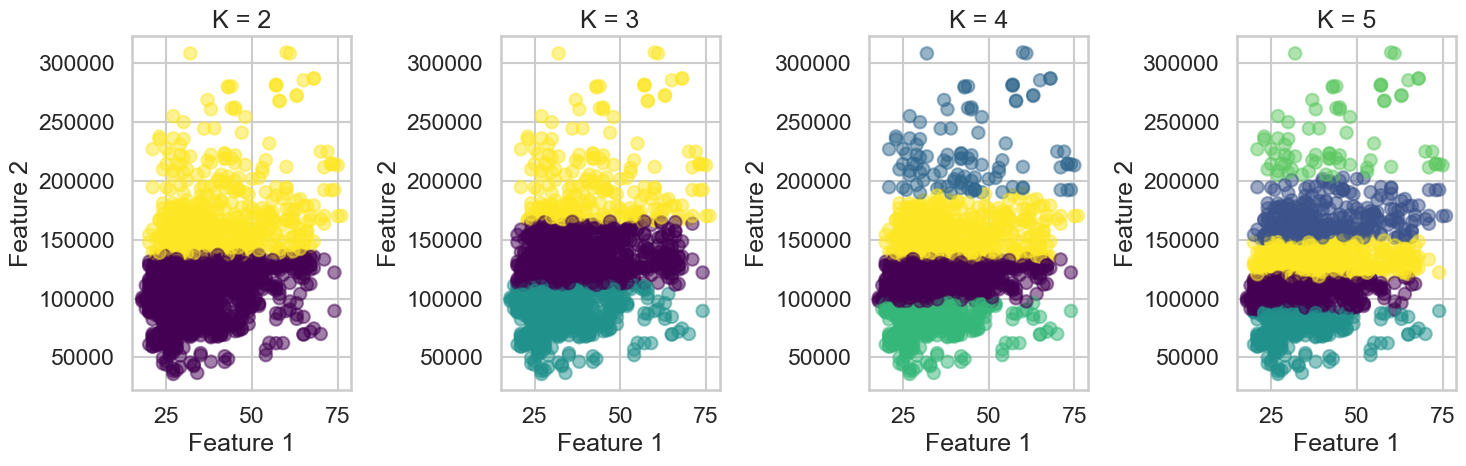

In [41]:
k_values = range(2, 6)  
kmeans_with_different_K(customers, k_values)

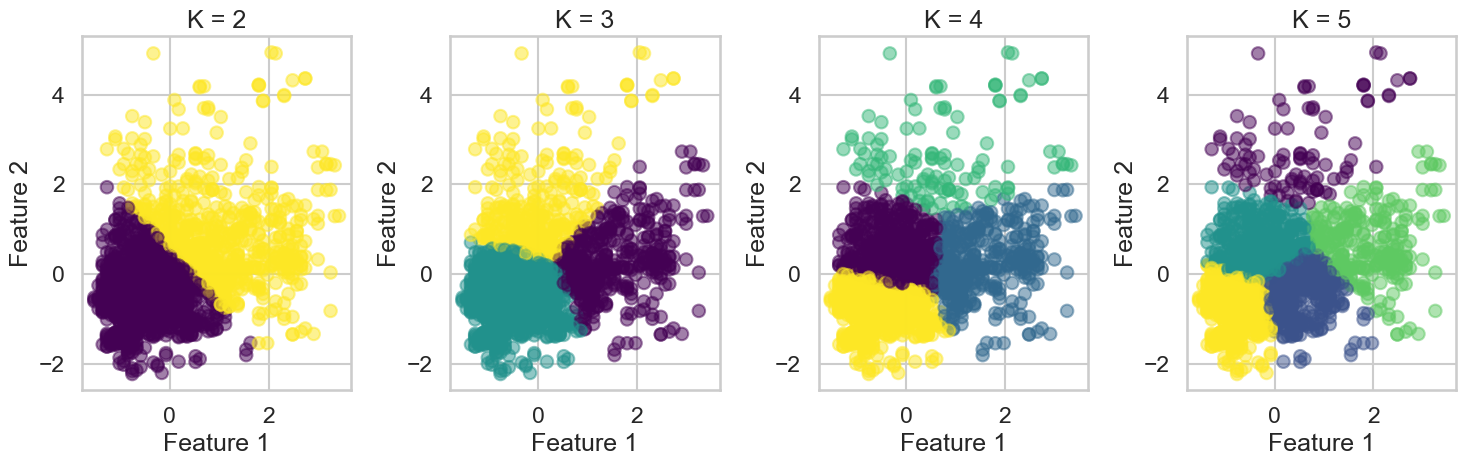

In [42]:
k_values = range(2, 6)  
kmeans_with_different_K(customers_normalized, k_values)

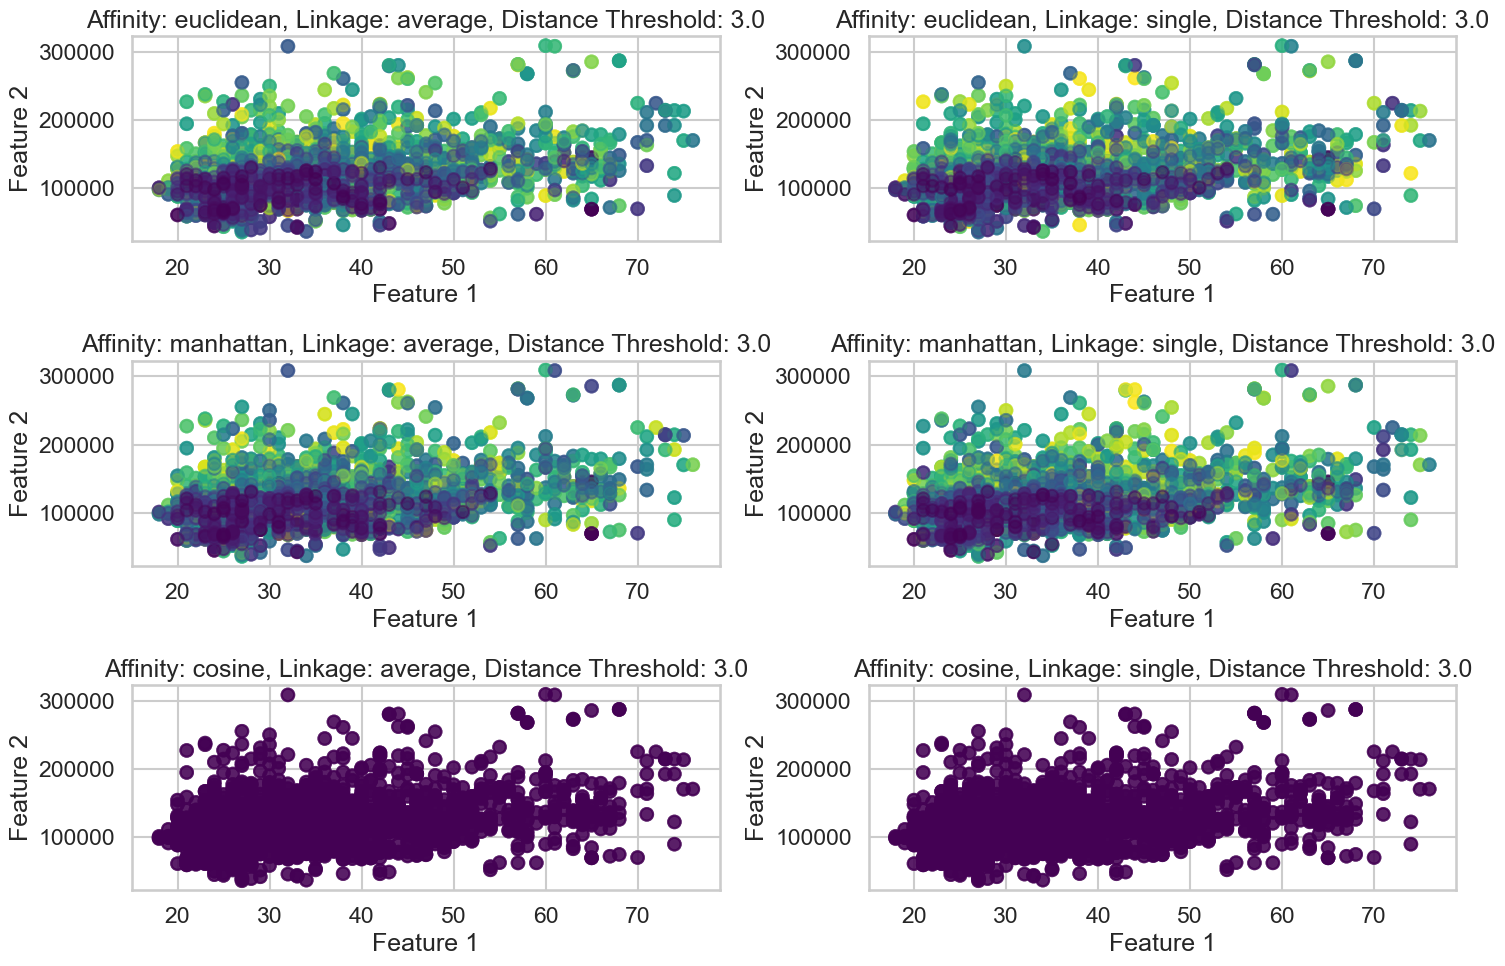

In [44]:
affinity_list = ['euclidean', 'manhattan', 'cosine']
linkage_list = ['average', 'single']
distance_threshold_list = [1.0, 2.0, 3.0]  
cluster_with_agglomerative(customers, affinity_list, linkage_list, distance_threshold_list)

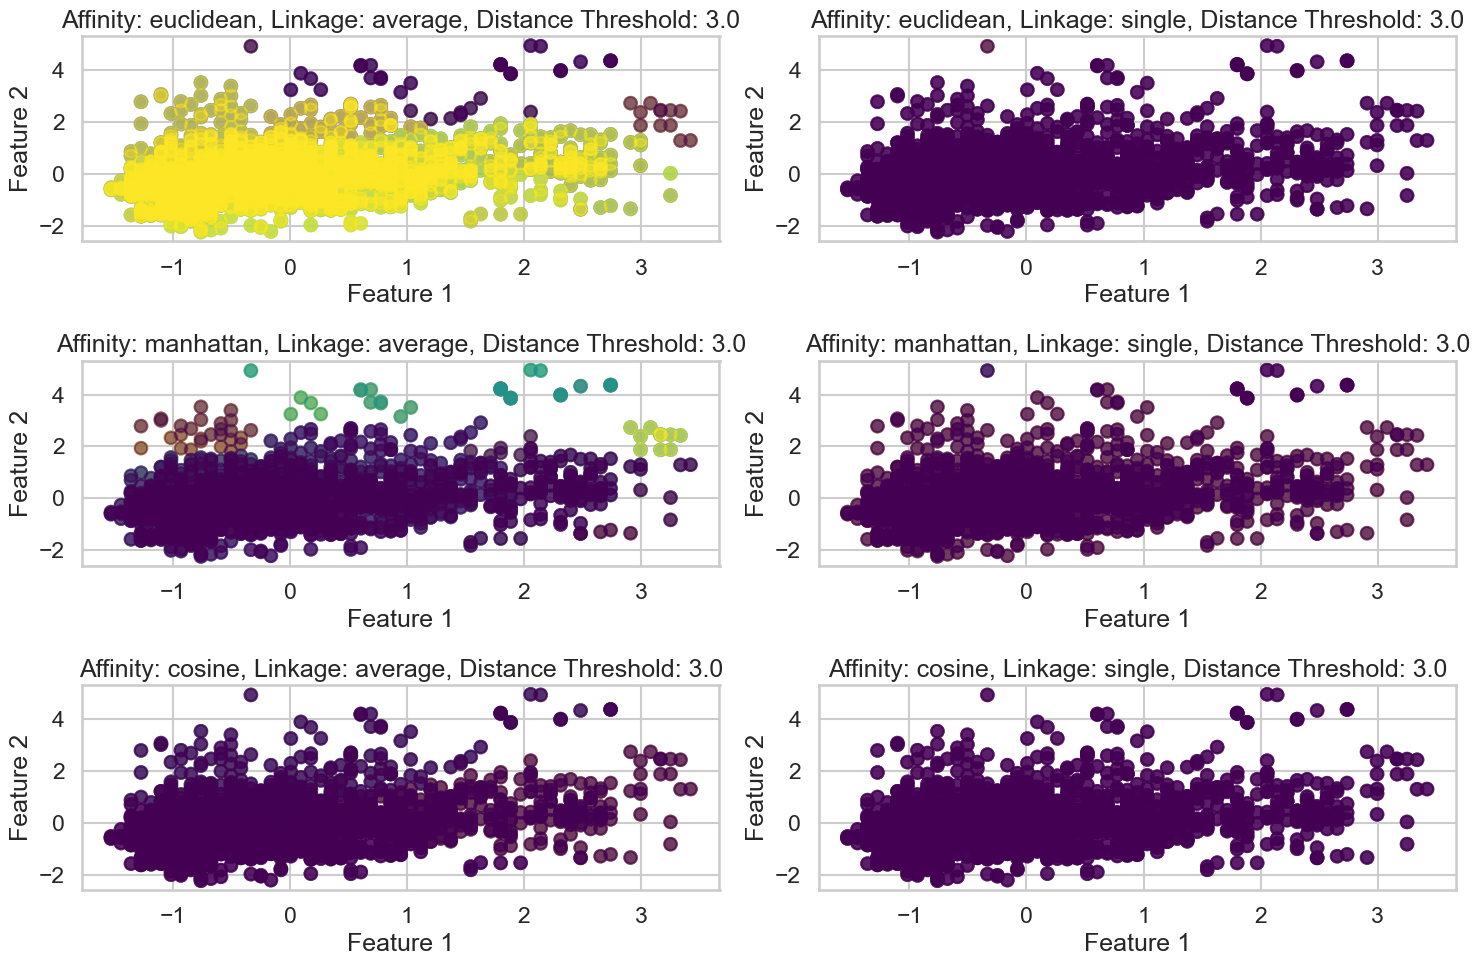

In [45]:
affinity_list = ['euclidean', 'manhattan', 'cosine']
linkage_list = ['average', 'single']
distance_threshold_list = [1.0, 2.0, 3.0] 
cluster_with_agglomerative(customers_normalized, affinity_list, linkage_list, distance_threshold_list)

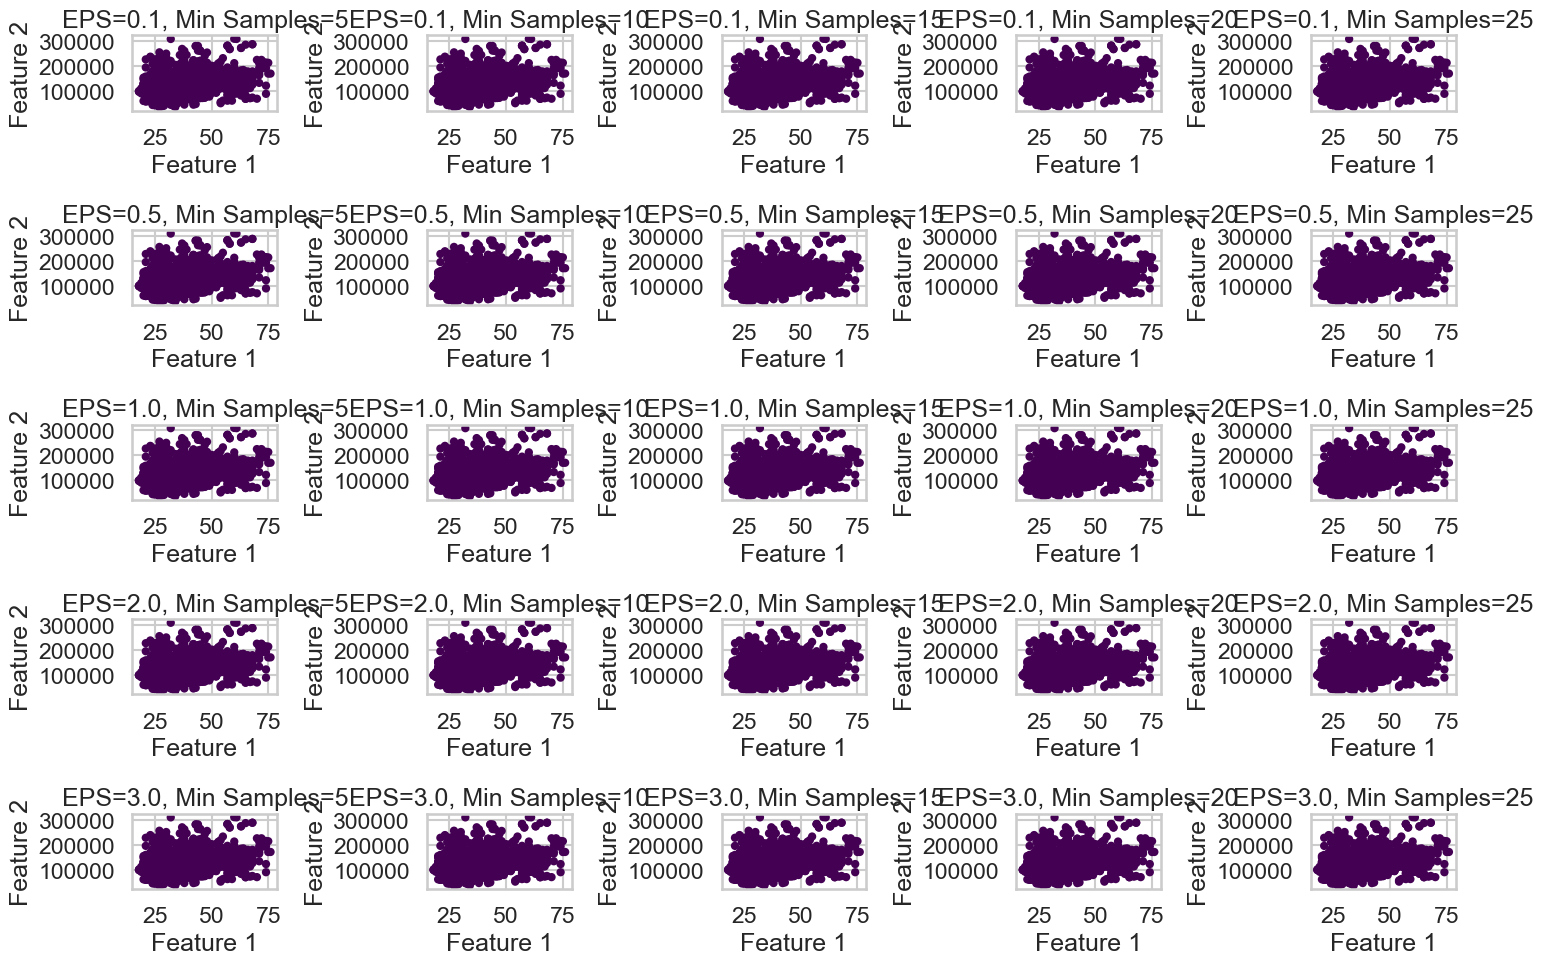

In [46]:
eps_values = [0.1, 0.5, 1.0, 2.0, 3.0]
min_samples_values = [5, 10, 15, 20, 25]
cluster_with_dbscan(customers, eps_values, min_samples_values)

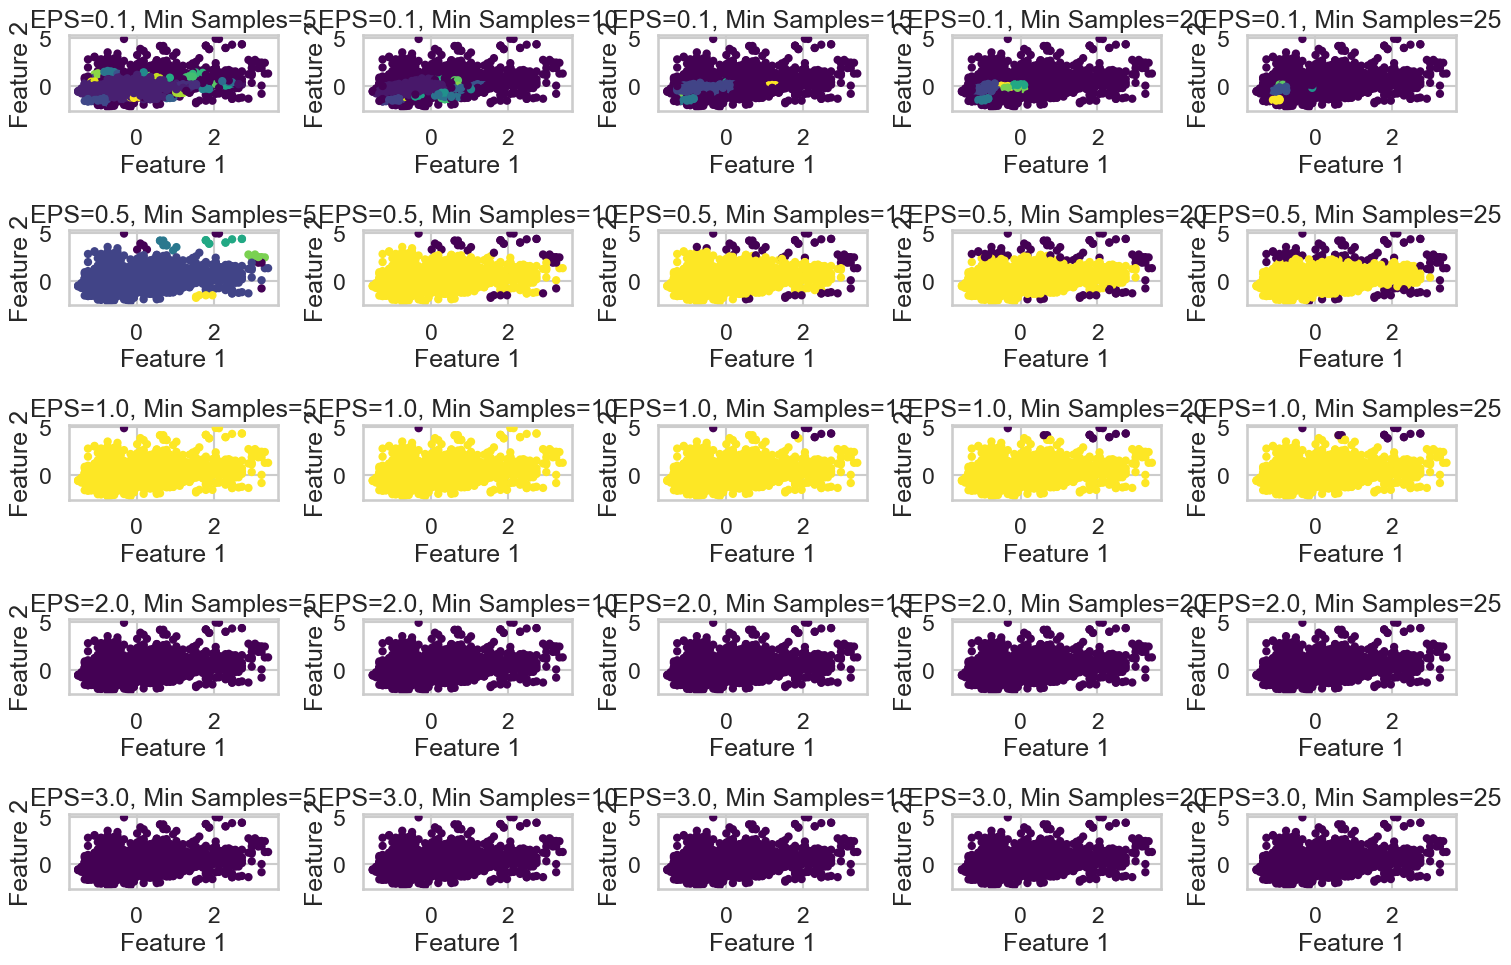

In [47]:
eps_values = [0.1, 0.5, 1.0, 2.0, 3.0]
min_samples_values = [5, 10, 15, 20, 25]
cluster_with_dbscan(customers_normalized, eps_values, min_samples_values)

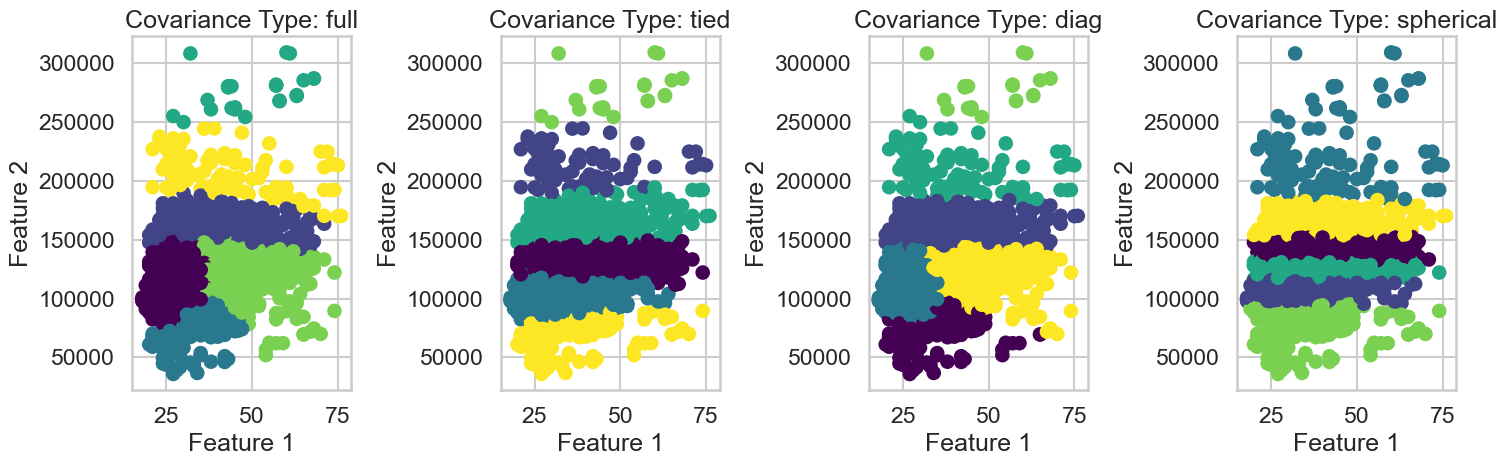

In [48]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
cluster_with_gmm(customers,covariance_types)

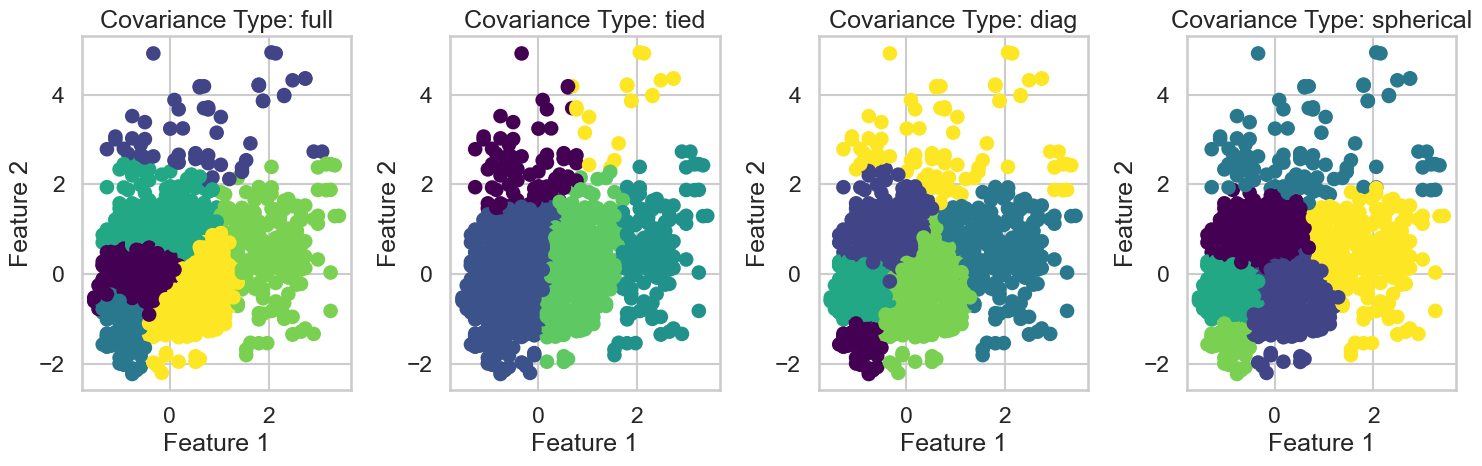

In [49]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
cluster_with_gmm(customers_normalized,covariance_types)